<a href="https://colab.research.google.com/github/mcstllns/DeepLearning/blob/main/P09b_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo con una RNN

Construímos con Keras una red recurrente para predecir las manchas solares (sunspots), como parece que hay una temporalidad se utiliza una rede recurrente.

In [ ]:
# Importamos las librerías necesarias

from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [ ]:
# Importamos los datos desde un github

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
df = read_csv(url, usecols=[1], engine='python')


In [ ]:
# Se convierten en flotantes
data = np.array(df.values.astype('float32'))

# Normalizamos (0,1)
# scaler = MinMaxScaler(feature_range=(0, 1))
data = MinMaxScaler(feature_range=(0, 1)).fit_transform(data).flatten()

# Se crea train y test
split = int(len(data)*0.8)
train_data = data[range(split)]
test_data = data[split:]


In [ ]:
test_data.shape

(564,)

In [ ]:

# Hay que generar la estructura de casos x tiemstapms x vars
# En este caso solo tenemos una var, la secuencia de manchas solares
# Esta es la parte mas compleja, se define una funcion que va a partir toda la secuencia en cadenas de t timestamps
# pe: 1, 2, 3, 4, 5, 6, 7 y t = 2

#     X: 1, 2  Y: 3
#        3, 4     5
#        5, 6     7

def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))
    return X, Y

time_stamps = 12

trainX, trainY = get_XY(train_data, time_stamps)
testX, testY = get_XY(test_data, time_stamps)


In [ ]:
print(trainX.shape) # vemos la estructura tridimensional de X
print(trainX)
print(trainY.shape) # Y solo tiene una estructura unidimensional
print(trainY)

In [ ]:
# Definimos la red

hidden_units = 2 # neuronas de la RNN
dense_units =  1 # neuronas de capa de prediccion
input_shape = (12,1) # timestamps x vars

# Se monta una red compuesta por una RNN que se despliega 12 veces y con la activación final
# se predice el siguiente valor de sunspot

model = Sequential()
model.add(SimpleRNN(1, input_shape=(time_stamps,1), activation="sigmoid"))
model.add(Dense(units=1, activation="linear"))
model.compile(loss='mse', optimizer='adam', metrics = ['mse'])

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 1)                 3         
                                                                 
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(trainX, trainY, epochs=30, batch_size=1, verbose=2)

In [ ]:
print(model.evaluate(trainX, trainY))
print(model.evaluate(testX, testY))

6/6 [==============================] - 0s 3ms/step - loss: 0.0065 - mse: 0.0065
[0.006543624680489302, 0.006543624680489302]
2/2 [==============================] - 0s 7ms/step - loss: 0.0175 - mse: 0.0175
[0.01745246909558773, 0.01745246909558773]


2/2 [==============================] - 0s 6ms/step


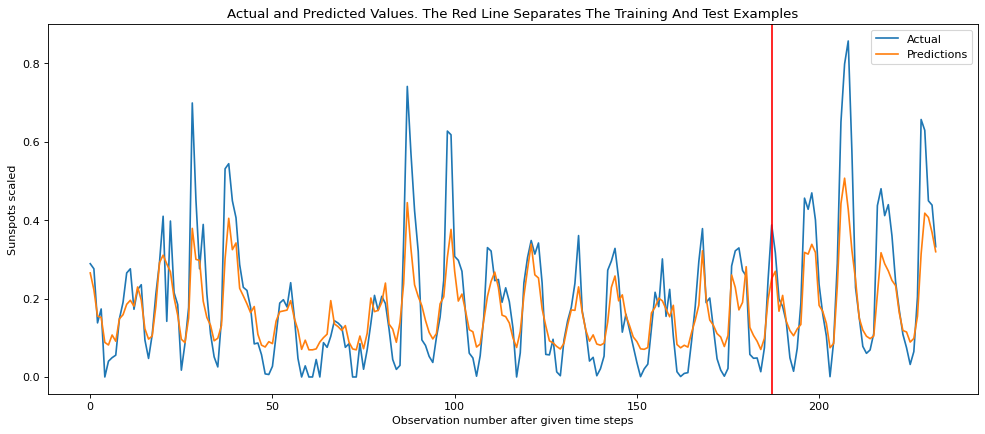

In [ ]:
# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

# Un grafico para el pronostico

def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')

plot_result(trainY, testY, train_predict, test_predict)